In [58]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [59]:
df_mall=pd.read_csv("F:/Intellipat/DataScienceWithPython/Data/Mall_Customers.csv")

In [60]:
df_mall.shape

(200, 5)

In [61]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [62]:
df_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [63]:
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
df_mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [65]:
#convert dataframe to array
#df_mall2=np.array(df_mall[0:1], dtype=np.float)

In [66]:
from sklearn import preprocessing
#Converting catgorical value to numeric value
le=preprocessing.LabelEncoder()
df_mall['Gender']=le.fit_transform(df_mall['Gender'])
df_mall['Gender'].unique()

array([1, 0], dtype=int64)

In [67]:
# Rename the column names into a readable name
df_mall.rename(index=str, columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'score'}, inplace=True)

In [68]:
df_mall.head()

,CustomerID,Gender,Age,Income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


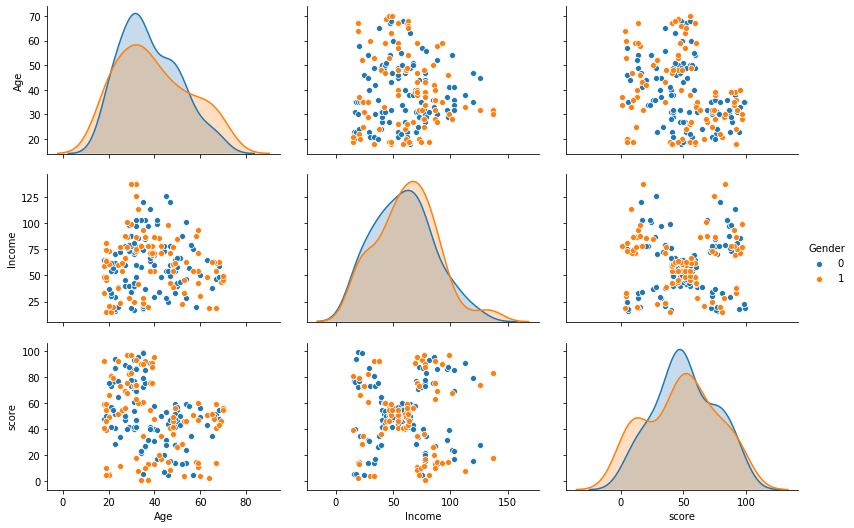

In [84]:
# As CustomerID will not have any relation with segmenting the customer, we can exclude that.
sns.pairplot(df_mall, vars=['Age','Income','score'], hue='Gender', aspect=1.5)

In [70]:
# As we can see above, gender column does not have any impact on segment as well. So we can exclude gender as well.
df_mall1 = df_mall.drop(['CustomerID','Gender'], axis=1)
df_mall1

,Age,Income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [72]:
from sklearn.cluster import KMeans
#Cluster analysis
kmeans3=KMeans(n_clusters=3)
y_kmeans=kmeans3.fit_predict(df_mall1)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

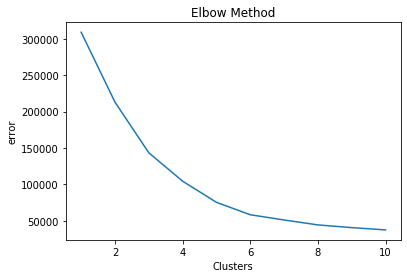

In [73]:
#Kmeans clustering
from sklearn.cluster import KMeans
#Elbow method to find the number of clusters
error=[]
for i in range(1,11):
    km=KMeans(n_clusters=i).fit(df_mall1)
    error.append(km.inertia_)
    
#fig=plt.subplots(figsize=(10,8))
#sns.lineplot(x=list(range(1,11)), y=error)
plt.plot(range(1,11), error)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("error")
plt.show()

    

In [ ]:
#In the above elbow method, we have observed that there are 2 possble cluster. one is at 3 and another is at 5.

In [74]:
#Cluster analysis
kmeans3=KMeans(n_clusters=3)
y_kmeans=kmeans3.fit_predict(df_mall1)
y_kmeans
kmeans3.cluster_centers_

array([[40.32520325, 44.15447154, 49.82926829],
       [40.39473684, 87.        , 18.63157895],
       [32.69230769, 86.53846154, 82.12820513]])

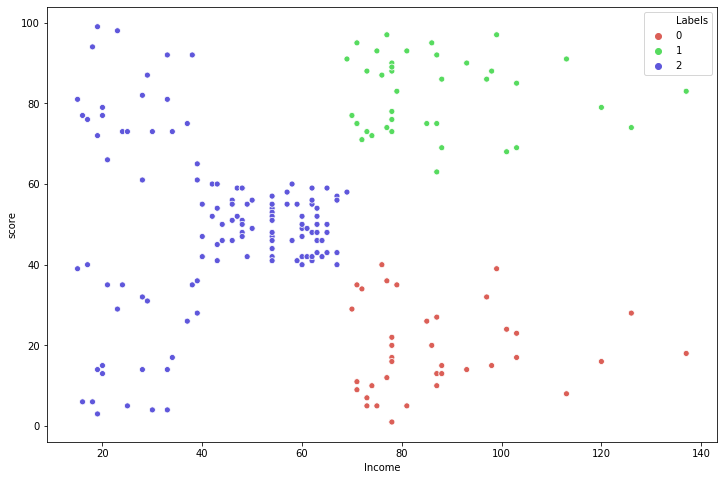

In [87]:
#3 clusters
km3=KMeans(n_clusters=3).fit(df_mall1)
df_mall1['Labels']=km3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(df_mall1['Income'], df_mall1['score'], hue=df_mall1['Labels'], palette=sns.color_palette('hls',3))

Text(0.5, 1.0, 'KMeans with 5 clusters')

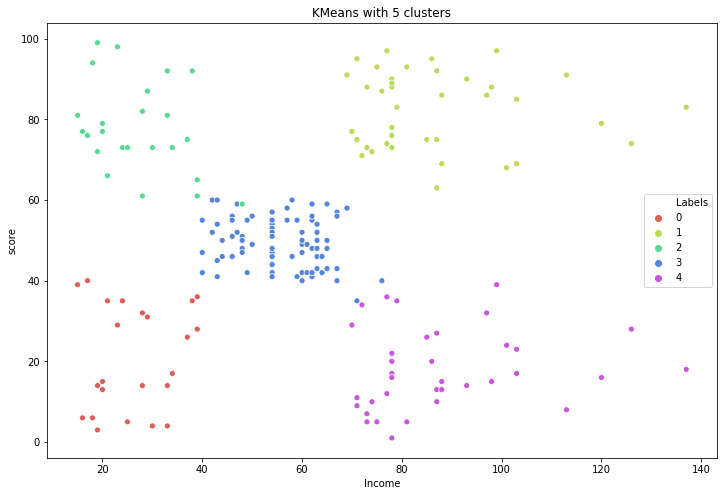

In [88]:
#5 clusters
km5=KMeans(n_clusters=5).fit(df_mall1)
df_mall1['Labels']=km5.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(df_mall1['Income'], df_mall1['score'], hue=df_mall1['Labels'], palette=sns.color_palette('hls',5))
plt.title('KMeans with 5 clusters')

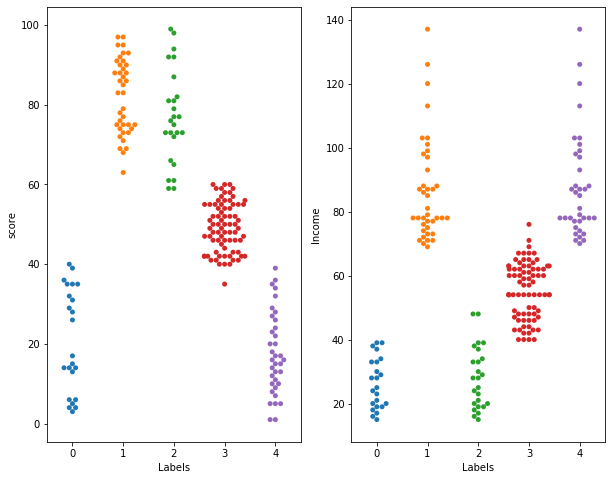

In [108]:
#To visualize more clearly with Swarmplot
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(121)
#fig, ax=plt.subplots(nrows=1, ncols=2)
#Labels according to spending
sns.swarmplot(x='Labels', y='score', data=df_mall1, ax=ax)

#Labels according to Income
ax=fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Income', data=df_mall1, ax=ax)
plt.show()